In [90]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)


In [18]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
#Drop null columns
    df.drop(columns=["Race","Education"],inplace=True)
#Drop low and high cardinality
    df.drop(columns=["timestamp","company","level","location","tag","gender","otherdetails"],inplace=True)
#Drop Leaky columns
#Drop multicollinearity
    df.drop(columns=["totalyearlycompensation","stockgrantvalue","bonus","cityid","dmaid","rowNumber","Masters_Degree","Bachelors_Degree","Doctorate_Degree","Highschool","Some_College","Race_Asian","Race_White","Race_Two_Or_More","Race_Black","Race_Hispanic"],inplace=True)
    return df
  

In [19]:
df = wrangle(r"C:\Users\HP\Desktop\New folder\Levels_Fyi_Salary_Data.csv")

<AxesSubplot:>

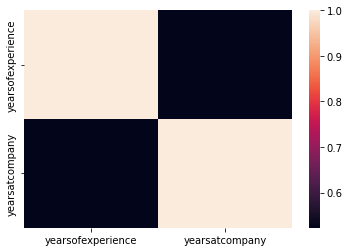

In [20]:
corr=df.select_dtypes("number").drop(columns="basesalary").corr()
sns.heatmap(corr)

In [42]:
df["title"].unique()

array(['Product Manager', 'Software Engineer',
       'Software Engineering Manager', 'Data Scientist',
       'Solution Architect', 'Technical Program Manager',
       'Human Resources', 'Product Designer', 'Marketing',
       'Business Analyst', 'Hardware Engineer', 'Sales', 'Recruiter',
       'Mechanical Engineer', 'Management Consultant'], dtype=object)

In [17]:
df.head()

,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,Product Manager,127000,1.5,1.5,107000.0,20000.0,10000.0,7392,807.0,1,0,0,0,0,0,0,0,0,0,0
1,Software Engineer,100000,5.0,3.0,0.0,0.0,0.0,7419,807.0,2,0,0,0,0,0,0,0,0,0,0
2,Product Manager,310000,8.0,0.0,155000.0,0.0,0.0,11527,819.0,3,0,0,0,0,0,0,0,0,0,0
3,Software Engineering Manager,372000,7.0,5.0,157000.0,180000.0,35000.0,7472,807.0,7,0,0,0,0,0,0,0,0,0,0
4,Software Engineer,157000,5.0,3.0,0.0,0.0,0.0,7322,807.0,9,0,0,0,0,0,0,0,0,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              62642 non-null  object 
 1   yearsofexperience  62642 non-null  float64
 2   yearsatcompany     62642 non-null  float64
 3   basesalary         62642 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.9+ MB


In [22]:
#Split Data
target ="basesalary"
features = ["yearsofexperience","yearsatcompany","title"]
X_train = df[features]
y_train = df[target]

In [23]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
print("mean salary:",round(y_mean,2))
print("MAE Baseline:",round(mean_absolute_error(y_train,y_pred_baseline),2))

mean salary: 136687.28
MAE Baseline: 43392.03


In [47]:
model = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    LinearRegression()
)
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [48]:
y_pred_training = model.predict(X_train)
print("MAE training:",round(mean_absolute_error(y_train,y_pred_training),2))

MAE training: 37903.96


In [50]:
intercept = model.named_steps["linearregression"].intercept_
round(intercept,2)

152537.46

In [56]:
coefficients = model.named_steps["linearregression"].coef_
coefficients[:17]


array([-73901.45752067, -64854.37883576, -24146.22281642, -78905.66837286,
       -15608.18009822, -70070.97495058, -46213.10098953, -64714.03931227,
          220.66710899, -36562.18578637,  56348.71054237, -53890.79810216,
       -29119.84625189, -46303.50394479, -55801.4971988 , -37984.109777  ,
       -39589.47193662])

In [69]:
feature_names = model.named_steps["onehotencoder"].get_feature_names()
print("len of feature names:", len(feature_names))
print(feature_names)

len of feature names: 161
['x0_0.0' 'x0_0.25' 'x0_0.3' 'x0_0.5' 'x0_0.58' 'x0_0.6' 'x0_0.8' 'x0_1.0'
 'x0_1.4' 'x0_1.5' 'x0_1.6' 'x0_2.0' 'x0_2.5' 'x0_3.0' 'x0_3.5' 'x0_3.8'
 'x0_4.0' 'x0_4.5' 'x0_5.0' 'x0_5.5' 'x0_6.0' 'x0_6.5' 'x0_6.75' 'x0_7.0'
 'x0_7.5' 'x0_8.0' 'x0_8.5' 'x0_9.0' 'x0_10.0' 'x0_10.5' 'x0_11.0'
 'x0_11.5' 'x0_12.0' 'x0_13.0' 'x0_14.0' 'x0_15.0' 'x0_16.0' 'x0_17.0'
 'x0_18.0' 'x0_19.0' 'x0_20.0' 'x0_21.0' 'x0_22.0' 'x0_23.0' 'x0_24.0'
 'x0_25.0' 'x0_26.0' 'x0_27.0' 'x0_28.0' 'x0_29.0' 'x0_30.0' 'x0_31.0'
 'x0_32.0' 'x0_33.0' 'x0_34.0' 'x0_35.0' 'x0_36.0' 'x0_37.0' 'x0_38.0'
 'x0_39.0' 'x0_40.0' 'x0_41.0' 'x0_42.0' 'x0_45.0' 'x0_69.0' 'x1_0.0'
 'x1_0.1' 'x1_0.2' 'x1_0.25' 'x1_0.3' 'x1_0.33' 'x1_0.4' 'x1_0.5'
 'x1_0.58' 'x1_0.6' 'x1_0.7' 'x1_0.75' 'x1_0.8' 'x1_0.85' 'x1_1.0'
 'x1_1.1' 'x1_1.2' 'x1_1.25' 'x1_1.4' 'x1_1.5' 'x1_1.6' 'x1_1.666'
 'x1_1.7' 'x1_1.75' 'x1_1.8' 'x1_1.9' 'x1_2.0' 'x1_2.3' 'x1_2.4' 'x1_2.5'
 'x1_2.6' 'x1_2.7' 'x1_2.75' 'x1_2.8' 'x1_2.9' 'x1_3.0' '

In [70]:
def make_prediction(experience, atcompany, title):
    data = {
        "yearsofexperience": experience,
        "yearsatcompany": atcompany,
        "title": title
    }
    df = pd.DataFrame(data,index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted apartment price: ${prediction}"

In [72]:
interact(
    make_prediction(3.0, 2.0, "Business Analyst"),
    experience=IntSlider(
        min=X_train["yearsofexperience"].min(),
        max=X_train["yearsofexperience"].max(),
        value=X_train["yearsofexperience"].mean(),
    ),

    atcompany=FloatSlider(
        min=X_train["yearsatcompany"].min(),
        max=X_train["yearsatcompany"].max(),
        step=1.0,
        value=X_train["yearsatcompany"].mean(),
    ),
    title=Dropdown(options=sorted(X_train["title"].unique())),
);

interactive(children=(IntSlider(value=7, description='experience', max=69), FloatSlider(value=2.70209294083841…